# Importing 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Load the dataset

In [3]:
df = pd.read_csv("D:/programming/python tenx/Financial-news-sentiment-stock-analysis/Data/raw_analyst_ratings.csv")  
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Headline Length Analysis

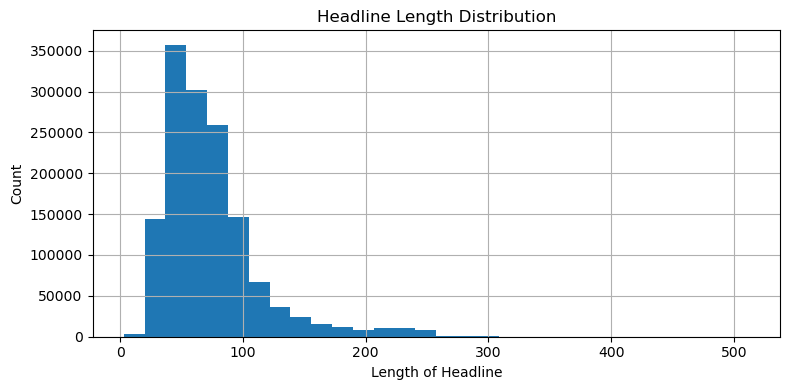

In [4]:
import matplotlib.pyplot as plt

df['headline_length'] = df['headline'].astype(str).apply(len)

plt.figure(figsize=(8, 4))
df['headline_length'].hist(bins=30)
plt.title('Headline Length Distribution')
plt.xlabel('Length of Headline')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Articles per Publisher

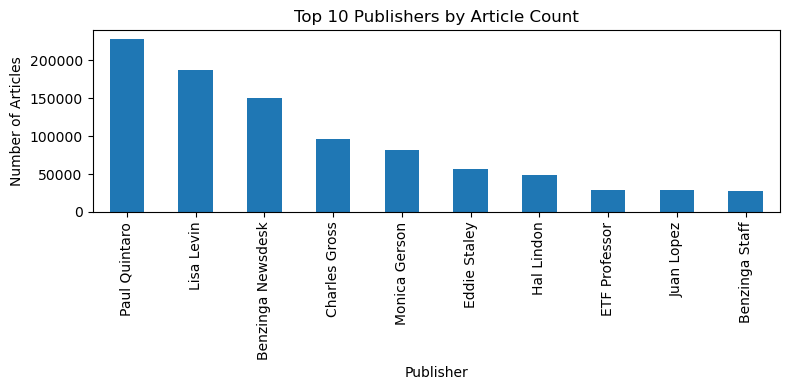

In [5]:
df['publisher'].value_counts().head(10).plot(kind='bar', figsize=(8, 4))
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


# Date Trends Over Time

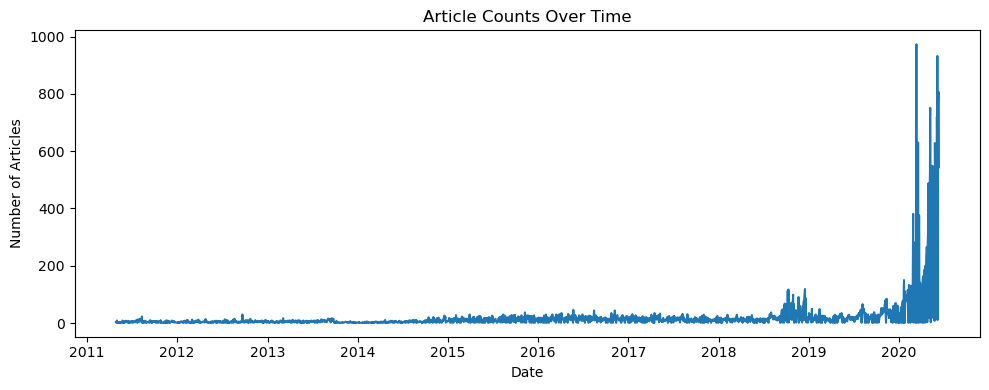

In [6]:
df['date'] = pd.to_datetime(df['date'].astype(str).str.strip(), errors='coerce', utc=True)
df = df.dropna(subset=['date'])

df['date'].dt.date.value_counts().sort_index().plot(figsize=(10, 4))
plt.title('Article Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


# Topic Modeling with LDA

In [7]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')
from nltk.corpus import stopwords

# Preprocess text
df['cleaned_headline'] = df['headline'].astype(str).str.lower()

vectorizer = CountVectorizer(stop_words=stopwords.words('english'), max_df=0.9, min_df=5)
X = vectorizer.fit_transform(df['cleaned_headline'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0:
trading, shares, companies, several, higher, market, stocks, session, us, moving
Topic 1:
etfs, earnings, etf, benzinga, 2020, top, downgrades, shares, scheduled, may
Topic 2:
reports, share, announces, stock, shares, update, co, says, deal, company
Topic 3:
eps, sales, estimate, yesterday, q1, vs, yoy, new, set, stocks
Topic 4:
stocks, week, 52, hit, price, target, lows, maintains, thursday, highs
